
## Text classification

* Language classification example
* Using `scikit-learn` and `pandas`

## Basic problem

* Find the language of a document. 

In [1]:
import pandas as pd
import seaborn as sns

%pylab inline

pd.options.display.max_colwidth = 500

Populating the interactive namespace from numpy and matplotlib


In [9]:
import os

fd = './datasets'
lang_files = [os.path.join(fd, f) for f in os.listdir(fd) if 'sentences' in f]
records = list()
    
for fn in lang_files:
    
    lang = fn.split('\\')[-1].split('_')[0]
    with open(fn) as f:
        for line in f:
            index, txt = line.strip().split('\t', 1)
            records.append({
                "lang": lang,
                "txt": txt
            })

lang_df = pd.DataFrame(records)

In [10]:
lang_df.sample(10)

,lang,txt
8727,eng,"""You can argue we're sending the wrong people to prison, but not under the current system."
14530,fra,"Les enchaînements sont assurés par un thème exposé demblée et qui revient ensuite à plusieurs reprises, comme la «Promenade» des Tableaux dune exposition de Moussorgski."
18015,fra,"Il n´a pas réussi à infléchir la politique de la Russie envers l´Iran et le Hamas, et n´a pas non plus convaincu les Européens d´approfondir leurs relations avec son pays."
23843,nld,Heeft u een eigen huis dat voor 1985 is gebouwd?
21320,nld,Biografie Sparxxx groeide eenzaam op: zijn ouderlijk huis stond vrij afgezonderd van de buitenwereld in het platteland van Georgia.
23463,nld,De heer Hatzman geeft aan dat er volgende week een overleg is tussen de colleges van Zutphen en Warnsveld en dan zal deze kwestie aan de orde komen.
11908,fra,"OTTAWA - L'inflation annuelle a glissé à son plus bas niveau en près de 15 ans le mois dernier, mais la plupart des consommateurs canadiens auront l'impression que ces statistiques sont, au mieux, légèrement trompeuses."
7982,eng,Gov. Kathleen Blanco is trying to rework the team's incentives from the state.
523,eng,"If third-generation iPods last for four hours or less on a full charge, they are deemed defective."
16230,fra,Mais ces Bobcats-là ont vraiment un truc en plus.


In [11]:
df = lang_df

df.lang.value_counts()

nld    10000
fra    10000
eng    10000
Name: lang, dtype: int64

In [13]:
def get_features(txt, letter):
    return txt.count(letter)

count_e = df.txt.map(lambda x: get_features(x, letter='e')).rename('count_e')
count_c = df.txt.map(lambda x: get_features(x, letter='c')).rename('count_c')
count_g = df.txt.map(lambda x: get_features(x, letter='g')).rename('count_g')

df = lang_df.join(count_e).join(count_g).join(count_c)
df.sample(5)

,lang,txt,count_e,count_g,count_c
4697,eng,"The first confessed: ""I have a terrible gambling problem.",7,2,1
28492,nld,Rik Hovingh dook in de geschiedenis en stuitte op unieke oude beelden uit die tijd.,13,2,1
13360,fra,La nouveautÃ© du calendrier interviendra le 10 mai avec le tournoi 1000 de Madrid qui remplace le Masters de Hambourg.,14,1,3
17138,fra,"Les personnes âgées de 45 à 54 ans sont les plus adeptes des écrans, avec une consommation moyenne de plus de neuf heures et demie par jour.",21,1,3
6927,eng,"SAN JUAN, Puerto Rico May 10, 2005 â€” A migrant adrift at sea with 66 others on Tuesday called 911 and guided a U.S. helicopter to their boat, an official said.",9,2,4


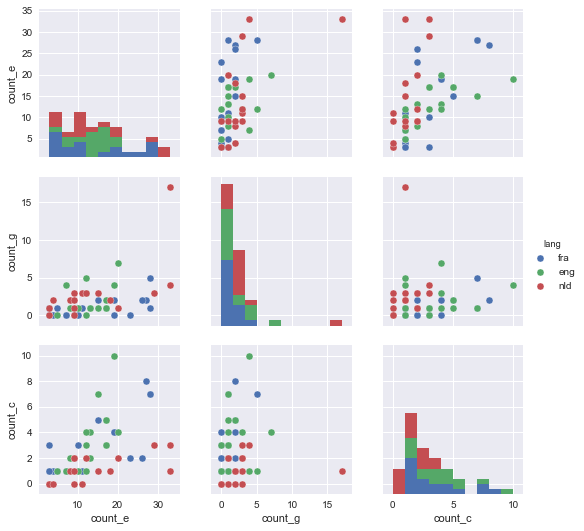

In [14]:
sns.pairplot(df.sample(50), hue='lang');

In [83]:
##### ned_vs_eng = df[df.lang.isin(['nld', 'eng'])]
ned_vs_eng = ned_vs_eng[ned_vs_eng.sum(axis=1) > 0]

X = ned_vs_eng[["count_e", "count_g", "count_c"]]

X = X.values / X.sum(axis=1).values.reshape(-1, 1)

y = (ned_vs_eng.lang == "eng").astype(int).values

display(X[::5000])
display(y[::5000])

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=int64)

array([1, 1, 0, 0])

## The `scikit-learn` system

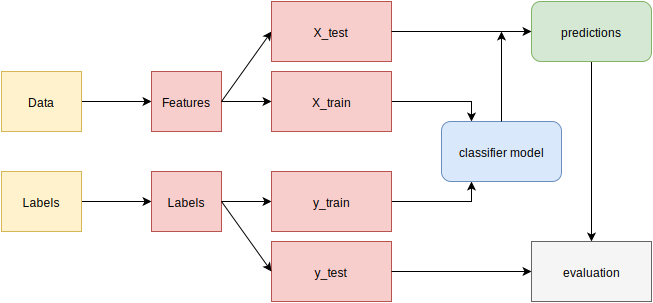

In [18]:
from IPython.display import SVG, display

display(SVG('./figure/scikit-learn-flow.svg'))

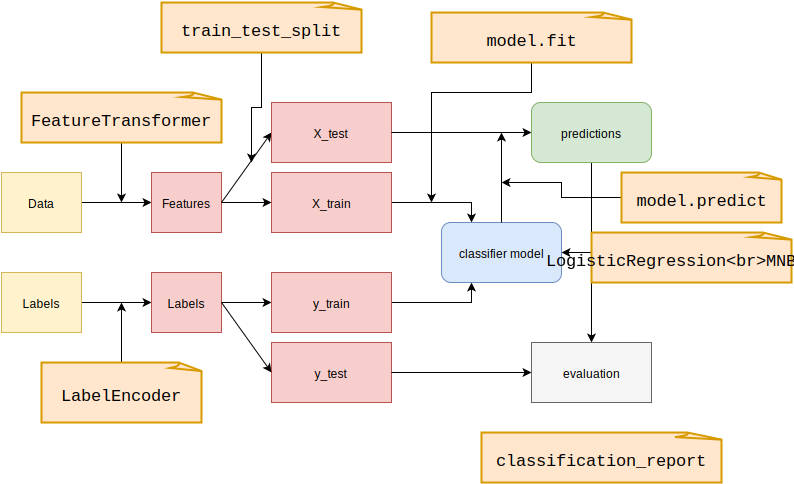

In [19]:
display(SVG('./figure/scikit-learn-flow-functions.svg'))

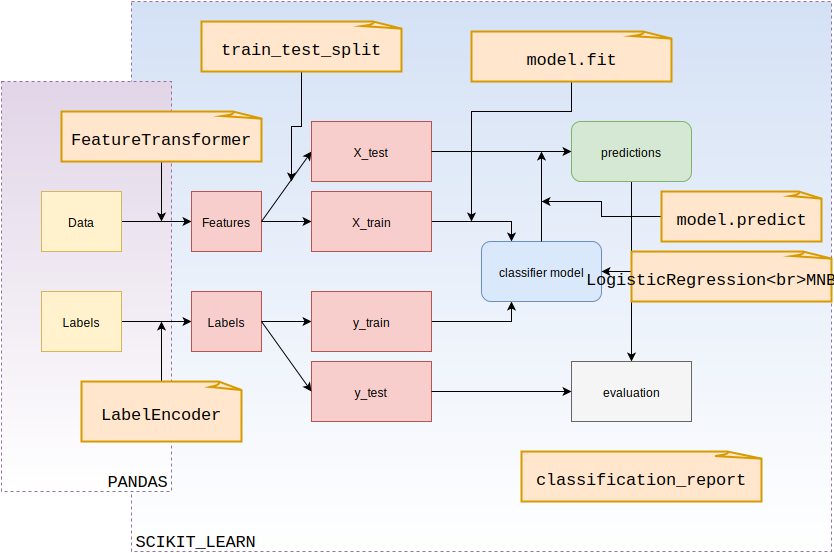

In [20]:
display(SVG('./figure/scikit-learn-flow-packages.svg'))

In [84]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

X_train.shape, y_test.shape

((15977L, 3L), (3995L,))

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
print
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.60      0.08      0.13      1989
          1       0.51      0.95      0.66      2006

avg / total       0.56      0.51      0.40      3995



In [92]:
sent = 'In de krant staan onzinnige zaken vermeld.'

feats = [get_features(sent, letter='e'), get_features(sent, letter='g'), get_features(sent, letter='c')]

classifier.predict([feats])

array([0])

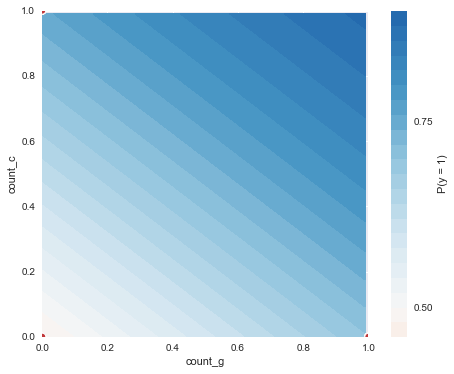

In [93]:
xx, yy = np.mgrid[0:1:.01, 0:1:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
grid = np.hstack([np.ones(grid.shape[0]).reshape(-1, 1) * .3, grid])

probs = classifier.predict_proba(grid)[:, 1].reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)

ax_c = f.colorbar(contour)
ax_c.set_label("P(y = 1)")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[100:,0], X[100:, 1], c=y[100:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(0, 1), ylim=(0, 1),
       xlabel="count_g", ylabel="count_c");

## Summary

We have now built a very simple classifier. It works, not very well, but we want to tune the features and the classifier. 

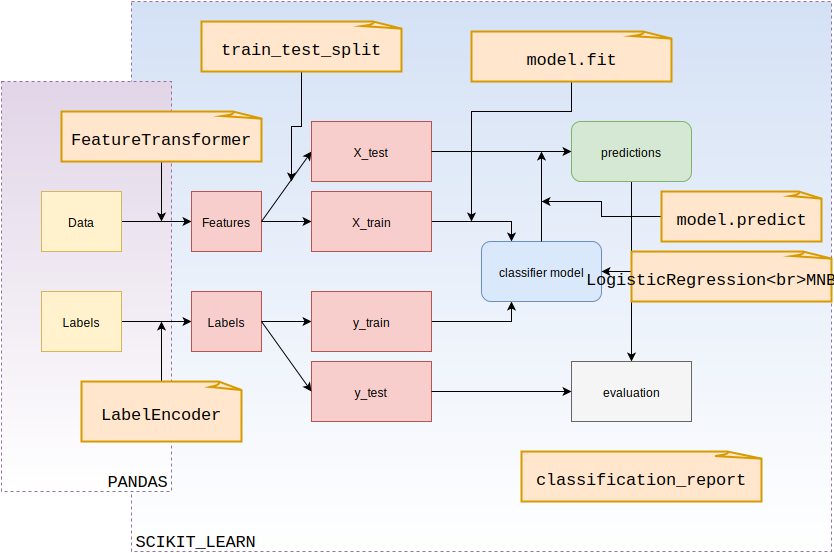

In [94]:
display(SVG('./figure/scikit-learn-flow-packages.svg'))

## Pipelines in the scikit-learn system

* To compactly represent and couple transformers and classifiers, you can use a `Pipeline`

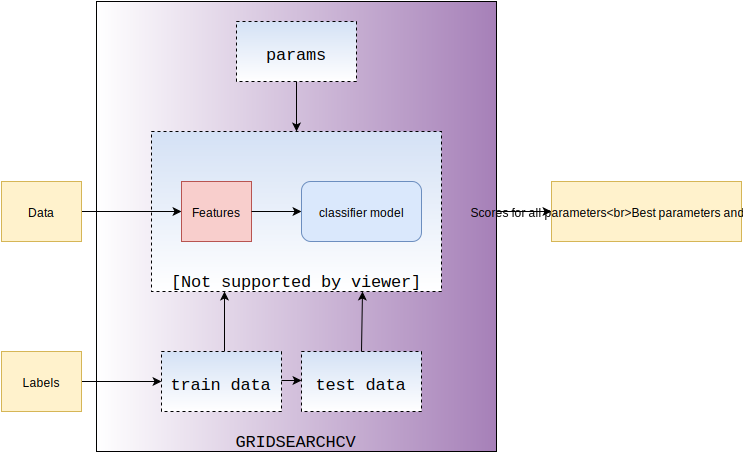

In [95]:
display(SVG('./figure/scikit-learn-pipeline.svg'))

In [26]:
## how do we define a function that efficiently creates the features 
## array([[ 3,  0],
##        [11,  0],
##           ...
##        [4,  12]])

df.sample(5)

,lang,txt,count_e,count_g,count_c
25487,fra,L&rsquo;opération doit avoir un effet positif sur les résultats du groupe pharmaceutique français dès la première année.,9,1,1
7216,eng,Net interest income is expected to grow by 9 to 10pc for the half year with the strong growth in lending assets offsetting a reduced net interest margin.,18,6,4
28876,fra,"Cette réforme prévoit notamment un temps fixe dexamen pour chaque projet de loi, ce qui devrait permettre détablir un planning parlementaire.",19,1,2
20546,fra,"James Walker pointe ainsi en tête avec 1´´8 d´avance sur Bertrand Baguette, lui-même suivi de prêt par Miguel Molina et Daniil Move.",15,2,2
25024,fra,"Il avait alors plaidé coupable à quatorze chefs d'accusation distincts, ce qui a marqué le début dun long processus judiciaire qui aura duré sept ans.",8,1,8


In [96]:
df.txt.str.count('e').values

# tokens = ["e", "ab"]

# [df.txt.str.count(token).values for token in tokens]

# np.vstack([df.txt.str.count(token).values for token in tokens]).T

array([ 3, 11, 13, ..., 40,  9,  5], dtype=int64)

In [97]:
from sklearn.base import TransformerMixin, BaseEstimator

class CharFeatureGenerator(BaseEstimator, TransformerMixin):

    def __init__(self, tokens=None):
        self.tokens = tokens

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, **transform_params):
        return np.vstack([X.str.count(token).astype(float) for token in self.tokens]).T
    
tfg = CharFeatureGenerator(tokens=['e', 'c', 'g'])

tfg.fit_transform(df.txt)

array([[  3.,   3.,   2.],
       [ 11.,   4.,   3.],
       [ 13.,   4.,   1.],
       ..., 
       [ 40.,   7.,   5.],
       [  9.,   0.,   0.],
       [  5.,   1.,   1.]])

In [98]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df.lang)

y

array([0, 0, 0, ..., 2, 2, 2], dtype=int64)

In [105]:
df.join(pd.Series(y, name='label_encoded')).sample(5)

,lang,txt,count_e,count_g,count_c,label_encoded
23110,nld,Gekozen om te trainen bij basic-fit want er is meer dan fietsen.,9,0,1,2
18412,fra,"Il suit en cela la position du médiateur Blaise Compaoré, et son appel au dialogue entre toutes les parties pour redéfinir les conditions de la transition.",15,1,2,1
7126,eng,It could take the time left before the current collective bargaining agreement expires June 30 just to get where the NBA thought it was in April.,20,5,4,0
9588,eng,"""We were really trying to figure out where we wanted to move forward â€” who we wanted to be,"" she said.",14,2,0,0
9703,eng,Bathurst could not be reached for comment Thursday evening.,6,1,3,0


In [106]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X = df.txt
y = le.fit_transform(df.lang.values)

pl = Pipeline([
    ('tfg', CharFeatureGenerator(tokens=['e', 'c', 'g'])),
    ('ss', Normalizer(norm='l1'))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

pl.fit_transform(X_train, y_train)

array([[ 0.76923077,  0.        ,  0.23076923],
       [ 0.64285714,  0.28571429,  0.07142857],
       [ 0.88888889,  0.11111111,  0.        ],
       ..., 
       [ 0.7037037 ,  0.22222222,  0.07407407],
       [ 0.8       ,  0.2       ,  0.        ],
       [ 0.85714286,  0.04761905,  0.0952381 ]])

In [107]:
le = LabelEncoder()

X = df.txt
y = le.fit_transform(df.lang.values)

pl = Pipeline([
    ('tfg', CharFeatureGenerator(tokens=['e', 'c', 'g'])),
    ('ss', Normalizer(norm='l1')),
    ('clf', LogisticRegression())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

pl.fit(X_train, y_train)

Pipeline(steps=[('tfg', CharFeatureGenerator(tokens=['e', 'c', 'g'])), ('ss', Normalizer(copy=True, norm='l1')), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [110]:
predictions = pl.predict(X_test)

df.loc[X_test.index, "prediction"] = le.classes_[predictions]

df[df.prediction.notnull()].sample(5)

,lang,txt,count_e,count_g,count_c,prediction
25023,nld,De weging van de verschillende onderscheiden groepen tov elkaar geeft tegelijk weer hulp bij hoe beslissingen af te wegen.,24,7,2,nld
8643,eng,A big demand for electricity for air conditioning is putting a strain on the power grid.,5,4,3,eng
26528,nld,Van bluesrock tot een tikkie funky en zelf een beetje country.,11,0,2,fra
18189,fra,"En y allant, nous savions qu'une partie du territoire était minée.",5,0,0,nld
8713,eng,"Home Depot, which intends to keep the employees and continue to operate the facility, will carry out Crown Bolt's initial PILOT agreement with the city.",17,1,5,fra


In [114]:
print(classification_report(y_pred=predictions, y_true=y_test))

             precision    recall  f1-score   support

          0       0.61      0.43      0.50      2002
          1       0.60      0.65      0.63      1996
          2       0.62      0.76      0.68      2002

avg / total       0.61      0.61      0.60      6000



In [115]:
import string

le = LabelEncoder()

X = df.txt
y = le.fit_transform(df.lang.values)

pl = Pipeline([
    ('tfg', CharFeatureGenerator(tokens=string.ascii_lowercase)),
    ('ss', Normalizer(norm='l1')),
    ('clf', LogisticRegression())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

pl.fit(X_train, y_train)
predictions = pl.predict(X_test)

print(classification_report(y_pred=predictions, y_true=y_test))

             precision    recall  f1-score   support

          0       0.91      0.91      0.91      2002
          1       0.92      0.96      0.94      1996
          2       0.94      0.91      0.92      2002

avg / total       0.93      0.93      0.92      6000



In [118]:
clf = pl.named_steps['clf']
clf.coef_

array([[ -1.79620451,   4.3533012 ,   3.20479014,  -2.1117397 ,
        -19.56883278,  13.30298483,   1.21901907,  30.97946858,
         -1.89257956, -15.01132595,  -7.72106922,  -2.41926253,
         -1.89867683,  -6.76987451,   4.89536915,  -4.03393892,
         -6.33789215,  -1.10853059,   1.88226151,   7.28320724,
        -15.35653913,  -9.24969423,  13.70041198,  -0.11441575,
         25.98539938,  -9.76110628],
       [  3.99661773,  -7.17819523,  12.23883836,  -0.27887365,
          2.40605468,  -4.74182321, -13.65769965, -26.88000142,
          5.06940574,  -5.40272215, -18.15101748,  11.13835218,
          6.09627477,   1.32721632,  -4.64466308,  10.61997846,
         11.87739448,   7.79669228,  14.20556085,  -1.55928096,
         28.75634103,  -2.37048108, -20.69206863,   4.06690244,
        -11.63490074,  -6.3374255 ],
       [ -0.67070215,   3.347152  , -14.13648966,   3.56019229,
         17.23382725,  -8.48857093,  12.07918501,  -7.14172508,
         -1.62319522,  18.8797

In [122]:
clf.coef_.shape

(3L, 26L)

In [131]:
coefs = pd.DataFrame(clf.coef_, columns=list(string.ascii_lowercase), index=le.classes_)
coefs

,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
eng,-1.796205,4.353301,3.204790,-2.111740,-19.568833,13.302985,1.219019,30.979469,-1.892580,-15.011326,...,-6.337892,-1.108531,1.882262,7.283207,-15.356539,-9.249694,13.700412,-0.114416,25.985399,-9.761106
fra,3.996618,-7.178195,12.238838,-0.278874,2.406055,-4.741823,-13.657700,-26.880001,5.069406,-5.402722,...,11.877394,7.796692,14.205561,-1.559281,28.756341,-2.370481,-20.692069,4.066902,-11.634901,-6.337425
nld,-0.670702,3.347152,-14.136490,3.560192,17.233827,-8.488571,12.079185,-7.141725,-1.623195,18.879756,...,-6.839146,-4.643821,-16.544952,-4.994863,-15.757306,12.036269,4.065443,-3.803773,-15.047857,14.904560


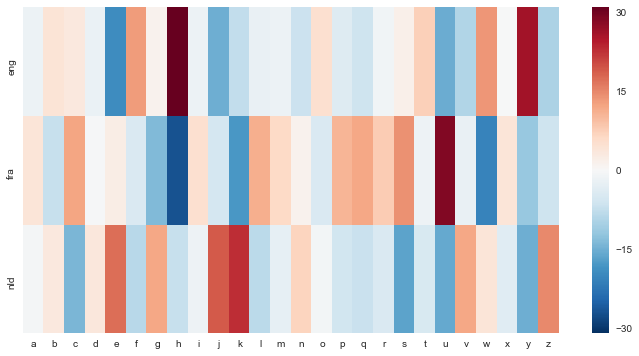

In [132]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

sns.heatmap(coefs, ax=ax)

In [ ]:
from sklearn.grid_search import GridSearchCV

class CharFeatureGenerator(BaseEstimator, TransformerMixin):
    def __init__(self, tokens=None, ignorecase=False):
        self.tokens = tokens
        self.ignorecase = ignorecase
    def fit(self, X, y=None, **fit_params):
        return self
    def transform(self, X, **transform_params):
        values = X.str.lower() if self.ignorecase else X
        return np.vstack([values.str.count(token).astype(float) for token in self.tokens]).T
    def get_params(self, deep=True):
        return {"tokens": self.tokens, "ignorecase": self.ignorecase}
    def set_params(self, **parameters):
        if "tokens" in parameters: self.tokens = parameters["tokens"]
        if "ignorecase" in parameters: self.ignorecase = parameters["ignorecase"]
        return self
    
X = df.txt
y = le.fit_transform(df.lang.values)

pl = Pipeline([
    ('tfg', CharFeatureGenerator()),
    ('ss', Normalizer()),
    ('clf', LogisticRegression())
])

params = {
    "tfg__tokens": [list(string.ascii_lowercase)[:i] for i in range(1, 26, 2)],
    "tfg__ignorecase": [True, False]
}

estimator = GridSearchCV(pl, params, cv=3, n_jobs=6)
estimator.fit(X, y);

C:\Users\Eigenaar\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [42]:
scores = pd.DataFrame(estimator.grid_scores_)
scores.sample(4)

,parameters,mean_validation_score,cv_validation_scores
3,"{'tfg__tokens': ['a', 'b', 'c', 'd', 'e', 'f', 'g'], 'tfg__ignorecase': True}",0.689267,"[0.68776244751, 0.693469346935, 0.686568656866]"
22,"{'tfg__tokens': ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's'], 'tfg__ignorecase': False}",0.899900,"[0.901219756049, 0.899789978998, 0.898689868987]"
5,"{'tfg__tokens': ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k'], 'tfg__ignorecase': True}",0.866200,"[0.867626474705, 0.866386638664, 0.864586458646]"
23,"{'tfg__tokens': ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u'], 'tfg__ignorecase': False}",0.912533,"[0.912617476505, 0.91499149915, 0.9099909991]"


In [43]:
scores.head()

,parameters,mean_validation_score,cv_validation_scores
0,"{'tfg__tokens': ['a'], 'tfg__ignorecase': True}",0.340933,"[0.341631673665, 0.339333933393, 0.341834183418]"
1,"{'tfg__tokens': ['a', 'b', 'c'], 'tfg__ignorecase': True}",0.510567,"[0.50899820036, 0.515751575158, 0.50695069507]"
2,"{'tfg__tokens': ['a', 'b', 'c', 'd', 'e'], 'tfg__ignorecase': True}",0.597133,"[0.596680663867, 0.603260326033, 0.591459145915]"
3,"{'tfg__tokens': ['a', 'b', 'c', 'd', 'e', 'f', 'g'], 'tfg__ignorecase': True}",0.689267,"[0.68776244751, 0.693469346935, 0.686568656866]"
4,"{'tfg__tokens': ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i'], 'tfg__ignorecase': True}",0.812900,"[0.815836832633, 0.815281528153, 0.807580758076]"


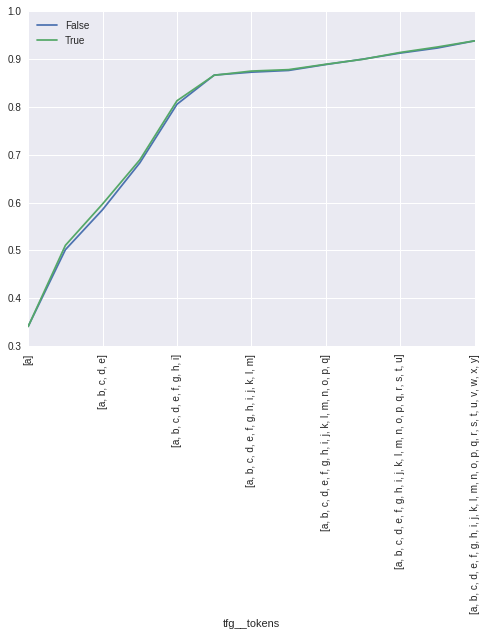

In [44]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

for p in params.keys():
    scores[p] = scores.parameters.map(lambda x: x[p])

for name, group in scores.groupby(scores.tfg__ignorecase):
    group.plot(x='tfg__tokens', y='mean_validation_score', ax=ax, label=name)
    
plt.xticks(rotation=90);